In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing requried Libraries**

In [44]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [45]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path='/content/drive/My Drive/Malaria Detection /Dataset/Train'
valid_path='/content/drive/My Drive/Malaria Detection /Dataset/Test'

In [46]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [47]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [48]:
# don't train existing weights
for layer in vgg19.layers:
  layer.trainable = False

In [49]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Malaria Detection /Dataset/Train/*')

In [50]:
folders

['/content/drive/My Drive/Malaria Detection /Dataset/Train/Parasite',
 '/content/drive/My Drive/Malaria Detection /Dataset/Train/Uninfected']

In [51]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [52]:
prediction = Dense(len(folders),activation ='softmax')(x)

#create a model object
model = Model(inputs=vgg19.input,outputs=prediction)

In [53]:
#view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [54]:
from tensorflow.keras.layers import MaxPooling2D

In [55]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)            

In [56]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [57]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [58]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Malaria Detection /Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [59]:
training_set

In [60]:

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Malaria Detection /Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [63]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 16s 1s/step - loss: 0.6500 - accuracy: 0.6226 - val_loss: 0.7223 - val_accuracy: 0.3881
Epoch 2/10
13/13 [==============================] - 16s 1s/step - loss: 0.5676 - accuracy: 0.6731 - val_loss: 0.8728 - val_accuracy: 0.3731
Epoch 3/10
13/13 [==============================] - 16s 1s/step - loss: 0.5049 - accuracy: 0.7236 - val_loss: 0.8505 - val_accuracy: 0.4030
Epoch 4/10
13/13 [==============================] - 16s 1s/step - loss: 0.5376 - accuracy: 0.7019 - val_loss: 0.8185 - val_accuracy: 0.4478
Epoch 5/10
13/13 [==============================] - 16s 1s/step - loss: 0.4669 - accuracy: 0.7548 - val_loss: 1.0045 - val_accuracy: 0.4030
Epoch 6/10
13/13 [==============================] - 16s 1s/step - loss: 0.4164 - accuracy: 0.8005 - val_loss: 0.9080 - val_accuracy: 0.4851
Epoch 7/10
13/13 [==============================] - 16s 1s/step - loss: 0.4744 - accuracy: 0.7548 - val_loss: 0.6499 - val_accuracy: 0.5522
Epoch 8/10
13/13 [==

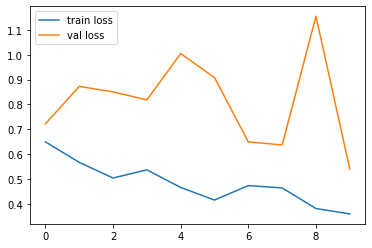

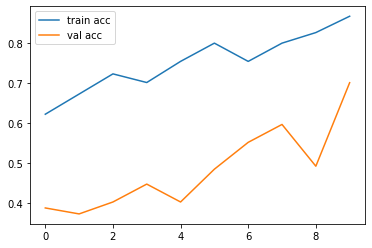

<Figure size 432x288 with 0 Axes>

In [64]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [65]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [66]:

y_pred = model.predict(test_set)

In [67]:
y_pred

array([[0.4795796 , 0.5204204 ],
       [0.89665085, 0.1033491 ],
       [0.28061154, 0.7193885 ],
       [0.97070676, 0.02929323],
       [0.9890336 , 0.01096642],
       [0.47800207, 0.5219979 ],
       [0.3318567 , 0.66814333],
       [0.7000734 , 0.29992658],
       [0.28203154, 0.71796846],
       [0.23796308, 0.76203686],
       [0.28526422, 0.7147358 ],
       [0.5219015 , 0.4780985 ],
       [0.2664731 , 0.73352695],
       [0.9078042 , 0.09219589],
       [0.17241287, 0.8275872 ],
       [0.3068767 , 0.6931233 ],
       [0.1289146 , 0.8710854 ],
       [0.17568015, 0.8243199 ],
       [0.8114483 , 0.18855166],
       [0.4803572 , 0.5196428 ],
       [0.8677623 , 0.13223766],
       [0.25934696, 0.74065304],
       [0.30847925, 0.69152075],
       [0.08041585, 0.9195842 ],
       [0.14580764, 0.8541924 ],
       [0.27160466, 0.7283953 ],
       [0.4989874 , 0.5010126 ],
       [0.36958542, 0.6304146 ],
       [0.52439153, 0.47560847],
       [0.23889843, 0.76110154],
       [0.

In [68]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [69]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0])

**Cross Veryfing the model**

In [70]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [71]:
model=load_model('model_vgg19.h5')

In [73]:
img=image.load_img('/content/drive/My Drive/Malaria Detection /Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [74]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [75]:
x.shape

(224, 224, 3)

In [76]:
x=x/255

In [77]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [78]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [79]:
a=np.argmax(model.predict(img_data), axis=1)

In [80]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
